In [90]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

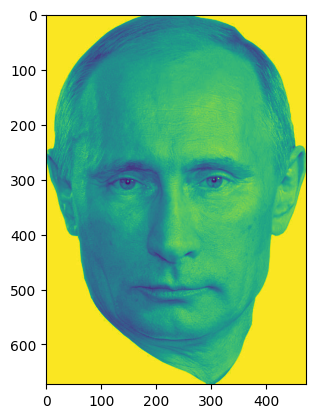

In [91]:
img = cv2.imread("Dataset/Unknown/sample_001.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

In [92]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [93]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray_img,1.1,4)
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi_gray = gray_img[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("Eyes are not detected!")
    else:
        for (ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

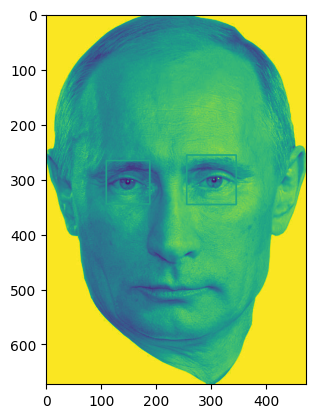

In [94]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

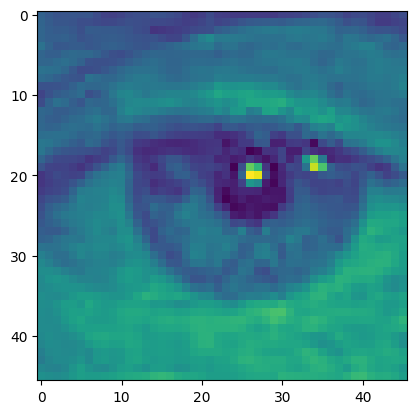

In [95]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2GRAY))

In [96]:
img_height = 224
img_width = 224
class_names = ['Closed_Eyes','Open_Eyes']
final_img = cv2.resize(eyes_roi, (img_height, img_width))
final_img = np.expand_dims(final_img, axis=0)

In [ ]:
model = tf.keras.models.load_model("Models/Image_Classification_Model_epochs-4_epochssteps-200_valsteps-20_dataset-84898.h5")

predictions = model.predict(final_img)
score = tf.nn.softmax(predictions[0])

print("The Prediction value is: {}, and Score value is: {}".format(predictions, score))

print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
The Prediction value is: [[-4.676951   5.9549093]], and Score value is: [2.4134099e-05 9.9997592e-01]
This image most likely belongs to Open_Eyes with a 100.00 percent confidence.
